## Logistic regression  

The logistic function:  

$$N(x) = \frac{K}{1 + \exp\left(-aK(x - x_0)\right)} \\
\frac{dN}{dt}= a\left(\frac{K-N}{K}\right)N$$
Typically, $K = 1$ and the following is used for regression:
$$f(x_i, a, x_0) = \frac{1}{1 + \exp\left(-a(x_i - x_0)\right)}$$

Logistic regression is used when $y_i = \{0,1\}$, or if it is boolean.  
Classifies Class A $\iff y_i = 0$, Class B $\iff y_i = 1$  

The **sigmoid function** is a special case of the logistic function when 
$K=1, x_0=0$:
$$f(x) = \frac{1}{1 + \exp(-ax)}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit
from scipy import linalg as la
import copy as cp

In [6]:
# Data 
X = np.array([1.2, 1.25, 1.30, 1.35, 1.40, 1.45, 1.50, 1.55, 1.60, 1.65, 1.70, 1.75])
Y = np.array([0, 0, 0, 0, 1, 0 , 1, 0, 1, 1, 1, 1])
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, Y)

# and plot the result
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, Y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(1, 3))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(1, 2)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

C:\Users\PC029038\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


NameError: name 'y' is not defined

<Figure size 576x432 with 0 Axes>

### Optimizing with Least Squares:  

$$
\begin{align}
&(x_n, y_n) : \text{$n$ th learning data} \\
&x_n = (x_n 1)^T : \text{vector of $x_n$ with added dimension} \\
&w = (w_1 w_2) ^T : \text{parameters} \\
&\hat{y_n} = \frac{1}{1 + \exp(-w^Tx)} : \text{prediction} \\
&e_n^2 = \frac{1}{2}(\hat{y_n} - y_n)^2 = \frac{1}{2}\left(\frac{1}{1 + \exp(-w^Tx)} - y_n\right)^2  \\
&E = \frac{1}{2}\sum^N_{n=1}(\hat{y_n} - y_n)^2 = \frac{1}{2}\sum^N_{n=1}\left(\frac{1}{1 + \exp(-w^Tx)} - y_n\right)^2 
\end{align}
$$

The objective function is the total error $E$, and we want to differentiate this to minimize it. However, for logistic regressions, we do not find an analytical solution. Thus, we must approximate through recursion.  

*The Gradient Method*:  
* Feed an approximate solution
* Use gradient of approximation 
* gradually improve solution  

eg. gradient descent, conjugate gradient method, newton method (see DSGE lecture notes)  


*Logistic Regression:*  
* On-line learning: Renew parameter per sample data  
$$w_{t+1} = w_{t} - \alpha \underbrace{\frac{\partial e_n^2}{\partial w}}_{\text{individual error}}$$

* Batch learning: Take entire sample data to renew parameter  
$$w_{t+1} = w_{t} - \alpha \underbrace{\frac{\partial E}{\partial w}}_{\text{whole error}}$$

0 [ 1.43783311 -0.03784065] 2.1404825444950126
100 [  9.07769011 -12.5690097 ] 1.3199699245079177
200 [ 10.78378647 -15.3412662 ] 1.2484806664784043
300 [ 11.50610975 -16.53500812] 1.2309185680995305
400 [ 11.83853847 -17.13958429] 1.2214102019429152
500 [ 11.98496148 -17.4501414 ] 1.2159660465067648
600 [ 12.0337503  -17.59816378] 1.2127664241972065
700 [ 12.02706099 -17.6478416 ] 1.2108619034059953
800 [ 11.98712292 -17.634458  ] 1.2096924703832164
900 [ 11.92714721 -17.5801249 ] 1.2089273212739324
1000 [ 11.855803   -17.50006958] 1.208380559118402
1100 [ 11.77907079 -17.40519746] 1.207953734283415
1200 [ 11.70110282 -17.30331844] 1.2075975177614213
1300 [ 11.62471681 -17.19990578] 1.2072882947544463
1400 [ 11.5517392  -17.09866141] 1.2070150015160084
1500 [ 11.48326715 -17.00196501] 1.206772229906716
1600 [ 11.41987302 -16.91123111] 1.2065568583940125
1700 [ 11.36176228 -16.82718755] 1.2063665404930557
1800 [ 11.30889298 -16.75008731] 1.206199111814191
1900 [ 11.26106403 -16.6798663

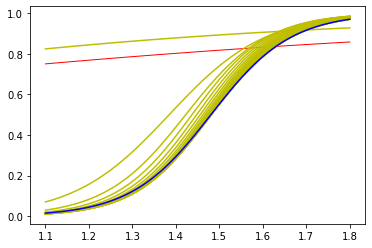

In [7]:
# Code example  
def sigm(z):
    """sigmoid function"""
    return 1/(1+np.exp(-z))

trainingData = np.array([[1.20, 0], [1.25, 0], [1.30, 0], [1.35, 0], [1.40, 1], [1.45, 0],
                         [1.50, 1], [1.55, 0], [1.60, 1], [1.70, 1], [1.75, 1]])
N, nd = trainingData.shape # N: samples, nd : dimension (number of variables, 2)
true = trainingData[:,1] # true values of y
D = cp.copy(trainingData)
D[:, nd - 1] = np.ones(N) # Data matrix X (get rid of y)
th = 1.0e-7 # tolerated threshold for error
alpha = 5.0 # learning rate
alpDec = 0.9999 # parameter for alpha decay, alpha shrinks as iteration progresses

nPlot = 100 # plot resolution
pltXaxis = np.linspace(1.1, 1.8, nPlot) # x-data for plot
xx = np.ones((nPlot, nd)) # data for plot
xx[:,0] = pltXaxis # change first parameter to x-data 

w = np.array([1.0, 0.0]) # initial model parameters (sigmoid function)
plt.plot(pltXaxis, sigm(xx.dot(w)), color="r", linewidth=1) # xx.dot(w) = dot product of xx and w
# xx.shape = 100 * 2, w.shape = 2, , xx.dot(w).shape = 100 * 1, w reshaped to 2 * 1 array during multiplication

# Actual model estimation  
errPrv = 10.0
for i in range(100000):
    for j in range(N):
        yhatj = sigm(D[j,:].dot(w))
        grad = (yhatj - true[j])*yhatj*(1-yhatj)*D[j,:]
        w = w - alpha * grad
        alpha = alpha * alpDec
    estimate = sigm(D.dot(w))
    errNew = np.sqrt((true - estimate).dot((true - estimate)))
    if abs(errNew - errPrv) < th: 
        plt.plot(pltXaxis, sigm(xx.dot(w)), color = "b") # converged model in blue
        break
    errPrv = errNew
    
    if i % 100 == 0:
        plt.plot(pltXaxis, sigm(xx.dot(w)), color = "y")
        print(i, w, errNew)

### Optimizing with Cross-Entropy  (Common)
Used widely for classification problems 
$$
\begin{align*}
&(x_n, y_n) : \text{$n$ th learning data} \\
&x_n = (x_n 1)^T : \text{vector of $x_n$ with added dimension} \\
&\mathbf{w} = (w_1 w_2) ^T : \text{parameters} \\
&\hat{y_n} = \frac{1}{1 + \exp(-\mathbf{w}^T\mathbf{x})} : \text{prediction}
\end{align*}
$$
Denote the probability that the $n$th data $x_n$ belongs to class $0, 1$ as $p_0, p_1$.  
The estimated value of those values are $q_0, q_1$. 
Then, 
$$
\begin{align*}
&p_1 = y_n, \; p_0 = 1 - y_n \\
&q_1 = \hat{y_n} = \frac{1}{1 + \exp(-\mathbf{w}^T\mathbf{x})}, \; q_0 = 1 - \hat{y_n}
\end{align*}
$$
And cross-entropy can be defined as:
$$e_n = -\sum_{k = 0}^1 p_k \log q_k = -y_n\log \hat{y_n} - (1 - y_n) \log (1 - \hat{y_n})$$


Then, the gradient is 
$$
\begin{align*}
e_n &= -\sum_{k = 0}^1 p_k \log q_k = -y_n\log \hat{y_n} - (1 - y_n) \log (1 - \hat{y_n}) \\
&\implies \frac{\partial e_n}{\partial \mathbf{w}} = -y_n \frac{1}{\hat{y_n}}\frac{\partial \hat{y_n}}{\partial \mathbf{w}} - (1 - y_n) \frac{1}{1-\hat{y_n}}\left(-\frac{\partial \hat{y_n}}{\partial \mathbf{w}}\right) \dots (1) \\
\hat{y_n} &= \frac{1}{1 + \exp (-\mathbf{w}^T \mathbf{x})} \\
&\implies \frac{\partial \hat{y_n}}{\partial \mathbf{w}} = \hat{y_n}(1 - \hat{y_n})\mathbf{x} \dots (2)
\end{align*}
$$

Now plug $(2)$ into $(1)$ to get 
$$\begin{align*}
\frac{\partial e_n}{\partial \mathbf{w}} &= (\hat{y_n} - y_n) \mathbf{x} \\
\implies \mathbf{w}_{new} &= \mathbf{w}_{prv} - \alpha \frac{\partial e_n}{\partial \mathbf{w}}
\end{align*}$$

In [9]:
# suppress warnings 
import warnings
warnings.simplefilter("ignore", RuntimeWarning)

0 [13.18089467  7.15146367] 149.6739256480454
100 [ 1259.48594679 -1773.13957078] nan
200 [ 2935.74657547 -4119.69125408] nan
300 [ 2945.68847577 -4134.01632529] nan
400 [ 10840.25034872 -15372.23759644] nan
500 [ 10870.24734872 -15372.23759644] nan
600 [ 10900.24434872 -15372.23759644] nan
700 [ 10930.24134872 -15372.23759644] nan
800 [ 10960.2383487  -15372.23759646] nan
900 [ 10978.29550878 -15380.76605354] nan
1000 [ 10988.37976757 -15394.98944012] nan
1100 [ 10998.46878537 -15409.2094274 ] nan
1200 [ 11008.56173239 -15423.4266081 ] nan
1300 [ 11018.69154002 -15437.61958707] nan
1400 [ 30685.6748884  -44304.40146081] nan
1500 [ 30715.6718884  -44304.40146081] nan
1600 [ 30745.6688884  -44304.40146081] nan
1700 [ 30775.6658884  -44304.40146081] nan
1800 [ 30805.6628884  -44304.40146081] nan
1900 [ 30835.6598884  -44304.40146081] nan
2000 [ 30865.6568884  -44304.40146081] nan
2100 [ 30895.6538884  -44304.40146081] nan
2200 [ 30925.6508884  -44304.40146081] nan
2300 [ 30955.6478884  -

18600 [ 257104.96473154 -368764.31603264] nan
18700 [ 257134.96173154 -368764.31603264] nan
18800 [ 257164.95873153 -368764.31603265] nan
18900 [ 257194.95573153 -368764.31603266] nan
19000 [ 257224.95273153 -368764.31603266] nan
19100 [ 257254.94973152 -368764.31603267] nan
19200 [ 257284.94673152 -368764.31603267] nan
19300 [ 257314.94373152 -368764.31603268] nan
19400 [ 257344.94073151 -368764.31603269] nan
19500 [ 257374.93773151 -368764.31603269] nan
19600 [ 257404.93473151 -368764.3160327 ] nan
19700 [ 257434.93173151 -368764.3160327 ] nan
19800 [ 257464.9287315  -368764.31603271] nan
19900 [ 257494.9257315  -368764.31603271] nan
20000 [ 257524.9227315  -368764.31603272] nan
20100 [ 257554.91973149 -368764.31603273] nan
20200 [ 257584.91673149 -368764.31603273] nan
20300 [ 257614.91373149 -368764.31603274] nan
20400 [ 257644.91073148 -368764.31603274] nan
20500 [ 257674.90773148 -368764.31603275] nan
20600 [ 257704.90473148 -368764.31603276] nan
20700 [ 257734.90173147 -368764.31

36600 [  736524.26703897 -1067402.39597675] nan
36700 [  736554.26403896 -1067402.39597675] nan
36800 [  736584.26103896 -1067402.39597675] nan
36900 [  736614.25803896 -1067402.39597675] nan
37000 [  736644.25503895 -1067402.39597675] nan
37100 [  736674.25203895 -1067402.39597675] nan
37200 [  736704.24903894 -1067402.39597675] nan
37300 [  736734.24603894 -1067402.39597675] nan
37400 [  736764.24303893 -1067402.39597675] nan
37500 [  736794.24003893 -1067402.39597675] nan
37600 [  736824.23703893 -1067402.39597675] nan
37700 [  736854.23403892 -1067402.39597675] nan
37800 [  736884.23103892 -1067402.39597675] nan
37900 [  736914.22803891 -1067402.39597675] nan
38000 [  736944.22503891 -1067402.39597675] nan
38100 [  736974.2220389  -1067402.39597675] nan
38200 [  737004.2190389  -1067402.39597675] nan
38300 [  737034.2160389  -1067402.39597675] nan
38400 [  737064.21303889 -1067402.39597675] nan
38500 [  737094.21003889 -1067402.39597675] nan
38600 [  737124.20703888 -1067402.395976

54700 [  741953.72403844 -1067402.39597675] nan
54800 [  741983.72103844 -1067402.39597675] nan
54900 [  742013.71803843 -1067402.39597675] nan
55000 [  742043.71503843 -1067402.39597675] nan
55100 [  742073.71203843 -1067402.39597675] nan
55200 [  742103.70903843 -1067402.39597675] nan
55300 [  742133.70603843 -1067402.39597675] nan
55400 [  742163.70303842 -1067402.39597675] nan
55500 [  742193.70003842 -1067402.39597675] nan
55600 [  742223.69703842 -1067402.39597675] nan
55700 [  742253.69405435 -1067402.39596613] nan
55800 [  742296.34521651 -1067393.95985803] nan
55900 [  742343.64900445 -1067382.42199941] nan
56000 [  742390.95279092 -1067370.88414178] nan
56100 [  742438.25657592 -1067359.34628512] nan
56200 [  742485.56035944 -1067347.80842944] nan
56300 [  742532.86414151 -1067336.27057474] nan
56400 [  742580.16792212 -1067324.732721  ] nan
56500 [  742627.47170128 -1067313.19486823] nan
56600 [  742674.77547899 -1067301.65701643] nan
56700 [  742722.07925526 -1067290.119165

73000 [  750432.57861198 -1065409.46026205] nan
73100 [  750479.88220534 -1065397.92253315] nan
73200 [  750527.18579784 -1065386.38480483] nan
73300 [  750574.48938948 -1065374.84707707] nan
73400 [  750621.79298026 -1065363.3093499 ] nan
73500 [  750669.09657018 -1065351.77162329] nan
73600 [  750716.40015924 -1065340.23389725] nan
73700 [  750763.70374746 -1065328.69617178] nan
73800 [  750811.00733482 -1065317.15844688] nan
73900 [  750858.31092134 -1065305.62072254] nan
74000 [  750905.61450701 -1065294.08299877] nan
74100 [  750952.91809184 -1065282.54527556] nan
74200 [  751000.22167583 -1065271.0075529 ] nan
74300 [  751047.52525898 -1065259.46983081] nan
74400 [  751094.82884129 -1065247.93210927] nan
74500 [  751142.13242277 -1065236.3943883 ] nan
74600 [  751189.43600342 -1065224.85666787] nan
74700 [  751236.73958324 -1065213.318948  ] nan
74800 [  751284.04316223 -1065201.78122868] nan
74900 [  751331.3467404 -1065190.2435099] nan
75000 [  751378.65031774 -1065178.70579168

90900 [  758899.90994483 -1063344.21470815] nan
91000 [  758947.21341385 -1063332.67706215] nan
91100 [  758994.5168823  -1063321.13941652] nan
91200 [  759041.8203502  -1063309.60177126] nan
91300 [  759089.12381754 -1063298.06412638] nan
91400 [  759136.42728433 -1063286.52648186] nan
91500 [  759183.73075057 -1063274.98883771] nan
91600 [  759231.03421626 -1063263.45119392] nan
91700 [  759278.33768139 -1063251.91355051] nan
91800 [  759325.64114598 -1063240.37590746] nan
91900 [  759372.94461002 -1063228.83826477] nan
92000 [  759420.24807336 -1063217.30062257] nan
92100 [ 2126016.16481595 -3087650.5405176 ] nan
92200 [ 2126046.16181595 -3087650.54051761] nan
92300 [ 2126076.15881596 -3087650.54051762] nan
92400 [ 2126106.15581596 -3087650.54051763] nan
92500 [ 2126136.15281596 -3087650.54051764] nan
92600 [ 2126166.14981597 -3087650.54051766] nan
92700 [ 2126196.14681597 -3087650.54051767] nan
92800 [ 2126226.14381597 -3087650.54051768] nan
92900 [ 2126256.14081597 -3087650.540517

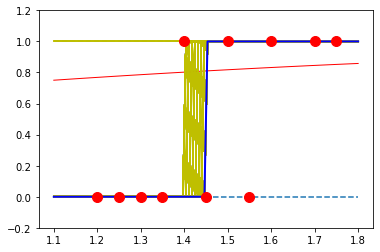

In [10]:
# For code, just change the main part of the code above 
def sigm(z):
    """sigmoid function"""
    return 1/(1+np.exp(-z))

trainingData = np.array([[1.20, 0], [1.25, 0], [1.30, 0], [1.35, 0], [1.40, 1], [1.45, 0],
                         [1.50, 1], [1.55, 0], [1.60, 1], [1.70, 1], [1.75, 1]])
N, nd = trainingData.shape # N: samples, nd : dimension (number of variables, 2)
true = trainingData[:,1] # true values of y
D = cp.copy(trainingData)
D[:, nd - 1] = np.ones(N) # Data matrix X (get rid of y)
th = 1.0e-7 # tolerated threshold for error
alpha = 5.0 # learning rate
alpDec = 0.9999 # parameter for alpha decay, alpha shrinks as iteration progresses
epsilon = 1.0e-7

nPlot = 100 # plot resolution 
pltXaxis = np.linspace(1.1, 1.8, nPlot) # x-data for plot 
xx = np.ones((nPlot, nd)) # data for plot 
xx[:,0] = pltXaxis

errPrv = 100.0
w = np.array([1.0, 0.0])

pltData = sigm(xx.dot(w))
plt.plot(pltXaxis, pltData, color="r", linewidth = 1)

for i in range(100000):
    for j in range(N):
        yhatj = sigm(D[j,:].dot(w))
        grad = (yhatj - true[j])*(D[j,:])
        w = w - alpha * grad
        alpha = alpha + alpDec
    
    estmt = sigm(D.dot(w))
    errNew = -true.dot(np.log(estmt)) - (1 - true).dot(np.log(1-estmt))
    if abs(errNew - errPrv) < th: 
        plt.plot(pltXaxis, sigm(xx.dot(w)), color = "b") # converged model in blue
        break
    errPrv = errNew
    
    if i % 100 == 0:
        pltData = sigm(xx.dot(w))
        plt.plot(pltXaxis, pltData, color = "y")
        print(i, w, errNew)
    
print(i, w, errNew, alpha)
pltData = sigm(xx.dot(w))
plt.plot(pltXaxis, pltData, color = "b", linewidth = 2)

plt.ylim(-0.2, 1.2)
plt.hlines([0, 1], 1.1, 1.8, linestyles="dashed")
plt.plot(trainingData[:,0], true, "ro", markersize=10)
plt.show()


## Steps for Classification  

* Based on the distributions of the classes (A, B), set border  
* Determine which side of border unknown datapoint is on. 
* project data points onto 2-dimensional plane, assign y = 1, to datapoints on one side of the border, 0 on the other
* conduct logistic regression on new datapoints.


## Steps for Linear Discriminatory Analysis 
* Extract norm vector of classifying hyperplane
* project datapoints onto said hyperplane 
* conduct logistic analysis on projected datapoints. 